In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
X_df = pd.read_csv("Training Data/Logistic_X_Train.csv")
Y_df = pd.read_csv("Training Data/Logistic_Y_Train.csv")

In [4]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [5]:
Y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [6]:
Y_df.head()

,label
0,1
1,1
2,1
3,0
4,0


In [152]:
# train test split
X, Y = X_df.values[:2500], Y_df.values[:2500]
Xt, Yt = X_df.values[2500:], Y_df.values[2500:]

# Logistic Regression

In [153]:
class LogisticRegression:
    def __init__(self, X, Y):
        """
        params; X: training independent features
        params; Y: training dependent feature/label
        """
        self.X = np.hstack((np.ones((X.shape[0], 1)), X)) # stacking vector of 1 for W0 (bias) to each sample
        self.Y = Y
        self.W = np.random.randn(self.X.shape[1], 1)
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []
    
    def sigmoid(self, Y):
        return 1.0 / (1.0 + np.exp(-Y))
        
    def predict(self, X):
        # this is Y hypothesis
        Yhypo = np.matmul(X, self.W)
        Yp = self.sigmoid(Yhypo)
        return Yp
        
    def binary_cross_entropy(self, Y, Yp):
        l = np.mean(Y*np.log(Yp) + (1-Y)*np.log(1-Yp))
        return -1.0 * l
    
    def accuracy(self, Y, Yp):
        """
        params; Y: actual label with value 0 or 1
        params; Yp: predicted prob with value between 0 and 1 for label 1
        """
        Yp_label = np.array(Yp > 0.5)
        a = np.mean(Yp_label == Y)
        return a
    
    def gradient(self, X, Y):
        Yp = self.predict(X)
        return np.matmul(X.T, (Yp-Y))
        
    def train(self, learning_rate=0.001, epochs=40, batch_size=200, vsplit=0.2):
        """
        func desc; this function trains the model over dataset 
        """
        # training and validation split
        no_of_samples = self.X.shape[0]
        split_idx = int(no_of_samples * (1 - vsplit))
        
        Xt, Yt = self.X[ : split_idx], self.Y[ : split_idx]
        Xv, Yv = self.X[split_idx : ], self.Y[split_idx : ]
        
        no_of_batches = int(Xt.shape[0]/batch_size)
        for i in range(epochs):
            # shuffle training data on every epoch to avoid residual samples
            train_data = list(zip(Xt, Yt)) # zip can only shuffle list ig
            np.random.shuffle(train_data)
            Xt_tupple, Yt_tupple = zip(*train_data) # unzip the shuffle train data
            Xt, Yt = np.asarray(Xt_tupple), np.asarray(Yt_tupple)
            
            for j in range(no_of_batches):
                
                Xt_batch = Xt[j*batch_size: (j+1)*batch_size]
                Yt_batch = Yt[j*batch_size: (j+1)*batch_size]
                
                Ytp_batch = self.predict(Xt_batch)
                
                self.W = self.W - learning_rate * self.gradient(Xt_batch, Yt_batch)
                
                self.loss.append(self.binary_cross_entropy(Yt_batch, Ytp_batch))
                self.acc.append(self.accuracy(Yt_batch, Ytp_batch))
                
                Yvp = self.predict(Xv)
                self.val_loss.append(self.binary_cross_entropy(Yv, Yvp))
                self.val_acc.append(self.accuracy(Yv, Yvp))
                
                print("epoch: {}/{} |acc: {:.3f} |val_acc: {:.3f} |loss: {:.3f} |val_loss: {:.3f}".format(i, 
                                                                           j, 
                                                                           self.acc[len(self.acc)-1],
                                                                           self.val_acc[len(self.val_acc)-1],
                                                                           self.loss[len(self.loss)-1],
                                                                           self.val_loss[len(self.val_loss)-1]
                                                                          ))

In [154]:
lr = LogisticRegression(X, Y)

In [155]:
lr.train()

epoch: 0/0 |acc: 0.335 |val_acc: 0.390 |loss: 1.040 |val_loss: 0.949
epoch: 0/1 |acc: 0.405 |val_acc: 0.462 |loss: 0.936 |val_loss: 0.846
epoch: 0/2 |acc: 0.450 |val_acc: 0.534 |loss: 0.836 |val_loss: 0.761
epoch: 0/3 |acc: 0.535 |val_acc: 0.596 |loss: 0.787 |val_loss: 0.688
epoch: 0/4 |acc: 0.670 |val_acc: 0.648 |loss: 0.624 |val_loss: 0.633
epoch: 0/5 |acc: 0.640 |val_acc: 0.696 |loss: 0.619 |val_loss: 0.579
epoch: 0/6 |acc: 0.715 |val_acc: 0.740 |loss: 0.551 |val_loss: 0.536
epoch: 0/7 |acc: 0.785 |val_acc: 0.758 |loss: 0.485 |val_loss: 0.502
epoch: 0/8 |acc: 0.805 |val_acc: 0.784 |loss: 0.441 |val_loss: 0.471
epoch: 0/9 |acc: 0.855 |val_acc: 0.794 |loss: 0.389 |val_loss: 0.444
epoch: 1/0 |acc: 0.760 |val_acc: 0.810 |loss: 0.467 |val_loss: 0.419
epoch: 1/1 |acc: 0.855 |val_acc: 0.822 |loss: 0.390 |val_loss: 0.396
epoch: 1/2 |acc: 0.830 |val_acc: 0.836 |loss: 0.395 |val_loss: 0.377
epoch: 1/3 |acc: 0.855 |val_acc: 0.844 |loss: 0.341 |val_loss: 0.360
epoch: 1/4 |acc: 0.865 |val_acc: 0

epoch: 14/0 |acc: 0.985 |val_acc: 0.982 |loss: 0.085 |val_loss: 0.092
epoch: 14/1 |acc: 0.975 |val_acc: 0.982 |loss: 0.066 |val_loss: 0.092
epoch: 14/2 |acc: 0.975 |val_acc: 0.982 |loss: 0.085 |val_loss: 0.091
epoch: 14/3 |acc: 0.965 |val_acc: 0.982 |loss: 0.103 |val_loss: 0.091
epoch: 14/4 |acc: 0.980 |val_acc: 0.982 |loss: 0.091 |val_loss: 0.091
epoch: 14/5 |acc: 0.990 |val_acc: 0.982 |loss: 0.074 |val_loss: 0.090
epoch: 14/6 |acc: 0.980 |val_acc: 0.982 |loss: 0.080 |val_loss: 0.090
epoch: 14/7 |acc: 0.960 |val_acc: 0.982 |loss: 0.107 |val_loss: 0.090
epoch: 14/8 |acc: 0.985 |val_acc: 0.982 |loss: 0.076 |val_loss: 0.089
epoch: 14/9 |acc: 0.990 |val_acc: 0.982 |loss: 0.069 |val_loss: 0.089
epoch: 15/0 |acc: 0.980 |val_acc: 0.982 |loss: 0.078 |val_loss: 0.089
epoch: 15/1 |acc: 0.975 |val_acc: 0.982 |loss: 0.077 |val_loss: 0.088
epoch: 15/2 |acc: 0.990 |val_acc: 0.982 |loss: 0.081 |val_loss: 0.088
epoch: 15/3 |acc: 0.985 |val_acc: 0.982 |loss: 0.080 |val_loss: 0.088
epoch: 15/4 |acc: 0.

epoch: 27/9 |acc: 0.990 |val_acc: 0.988 |loss: 0.074 |val_loss: 0.067
epoch: 28/0 |acc: 0.985 |val_acc: 0.988 |loss: 0.054 |val_loss: 0.067
epoch: 28/1 |acc: 0.995 |val_acc: 0.988 |loss: 0.048 |val_loss: 0.067
epoch: 28/2 |acc: 0.980 |val_acc: 0.988 |loss: 0.068 |val_loss: 0.067
epoch: 28/3 |acc: 0.980 |val_acc: 0.988 |loss: 0.074 |val_loss: 0.067
epoch: 28/4 |acc: 0.995 |val_acc: 0.988 |loss: 0.064 |val_loss: 0.067
epoch: 28/5 |acc: 0.990 |val_acc: 0.988 |loss: 0.058 |val_loss: 0.066
epoch: 28/6 |acc: 0.985 |val_acc: 0.988 |loss: 0.086 |val_loss: 0.066
epoch: 28/7 |acc: 0.975 |val_acc: 0.988 |loss: 0.071 |val_loss: 0.066
epoch: 28/8 |acc: 0.995 |val_acc: 0.988 |loss: 0.040 |val_loss: 0.066
epoch: 28/9 |acc: 0.995 |val_acc: 0.988 |loss: 0.037 |val_loss: 0.066
epoch: 29/0 |acc: 0.990 |val_acc: 0.988 |loss: 0.048 |val_loss: 0.066
epoch: 29/1 |acc: 0.995 |val_acc: 0.988 |loss: 0.056 |val_loss: 0.066
epoch: 29/2 |acc: 0.995 |val_acc: 0.988 |loss: 0.041 |val_loss: 0.066
epoch: 29/3 |acc: 0.

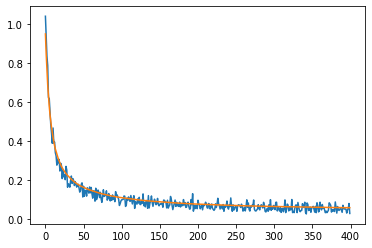

In [156]:
plt.plot(lr.loss)
plt.plot(lr.val_loss)
plt.show()

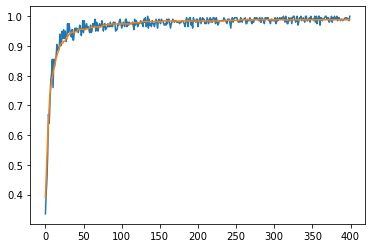

In [157]:
plt.plot(lr.acc)
plt.plot(lr.val_acc)
plt.show()

In [161]:
# predict label from logistic regression
W0_Xt = np.hstack((np.ones((Xt.shape[0], 1)), Xt))
Yp_lr = (lr.predict(W0_Xt) > 0.5)

# Support Vector Machine

In [268]:
class SVM:
    def __init__(self, X, Y):
        self.X = X
        Y[Y==0] = -1
        self.Y = Y.reshape((-1, ))
        self.W = np.random.randn(X.shape[1], )
        self.b = 0
        self.loss = []
        self.acc = []
        
    def decision_vector(self):
        """
        func desc; it calculates vector [0      if t[i] >= 1]
                                        [1-t[i] if t[i] <  1]
                                        where, t[i] = y[i] * (W.T * X[i] + b)
        return; t vector: shape(no_of_samples, )
        """
        # calculate t vector
        t = self.Y * (np.matmul(self.X, self.W) + self.b)
        dv = np.where(t>=1, 0, 1-t)
        return dv
        
    def hinge_loss(self, c):
        """
        formula; L = 1/2 * W.T * W + c summation max(0, 1-t[i])
        params; c: penality applied to the error/outliers
        return; loss: it is a scalar value
        """
        #dv = 
        l = (0.5 * np.matmul(self.W.T, self.W)) + (c * np.sum(self.decision_vector()) )
        return l
    
    def delta_Lw(self, c):
        """
        func desc; computes partial derivative of hinge loss over W
        formula; dL/dW = W + (c * 
                              summation(Y[i] * 
                                        W.T * 
                                        {o if 1-t[i] <=0
                                         1 if 1-t[i] > 1}
                                        )
                              )
                              where 1-t[i] was previously calculated as decision vector
        return; delta_L over W: shape is same as W (no_of_feature, )
        """
        dv = self.decision_vector() # decision vector
        dW = self.W + (c * np.matmul(self.X, 
                                     (np.where(dv>0, -1, 0) * self.Y)
                                    )
                      )
        return dW

In [266]:
svc = SVM(X, Y)

In [267]:
dv = svc.delta_Lw(11)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2500 is different from 3)

In [258]:
dv

111461644.70554058

In [247]:
np.where(dv>=1, 0, 1-dv)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# Conclusion

In [163]:
cm_lr = confusion_matrix(Yt, Yp_lr)

In [175]:
cmd_lr = ConfusionMatrixDisplay(cm_lr, display_labels=[0, 1])

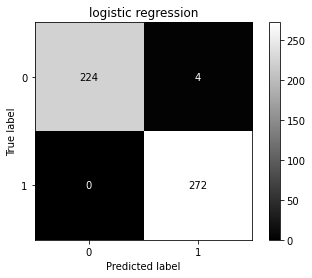

In [177]:
cmd_lr.plot(cmap='gray')
cmd_lr.ax_.set_title("logistic regression")
plt.show()